# **FINAL PROJECT CODES**






In [58]:
# First, before using data for regression analysis, let's clean the data!

The first step we need to do before get into the regression analysis is cleaning our dataa.

In [59]:
#IMPORT ALL TOOLS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#READ DATA
Hprice = pd.read_csv('Hprice.csv')#load data
print(Hprice.shape) #read shape of data
print(Hprice.dtypes) #read datatype

(88, 11)
Price               float64
Assess              float64
Count of bedroom      int64
Lot size              int64
House size            int64
Colonial?             int64
Lprice              float64
Lassess             float64
Llotsize            float64
Lsqrft              float64
Unnamed: 10         float64
dtype: object


In [60]:
Hprice.rename(columns = {'Lot size':'lot_size', 'House size':'house_size', 'Count of bedroom':'bdrm', 'Colonial?':'colonial'}, inplace=True)
Hprice.head()

,Price,Assess,bdrm,lot_size,house_size,colonial,Lprice,Lassess,Llotsize,Lsqrft,Unnamed: 10
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934,NaN
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198,NaN
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482,NaN
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938,NaN
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630,NaN


In [61]:
Hprice

,Price,Assess,bdrm,lot_size,house_size,colonial,Lprice,Lassess,Llotsize,Lsqrft,Unnamed: 10
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934,NaN
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198,NaN
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482,NaN
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938,NaN
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630,NaN
...,...,...,...,...,...,...,...,...,...,...,...
83,295.0,318.3,3,6056,1837,1,5.686975,5.762994,8.708805,7.515889,NaN
84,236.0,259.4,3,5828,1715,0,5.463832,5.558371,8.670429,7.447168,NaN
85,202.5,258.1,3,6341,1574,0,5.310740,5.553347,8.754792,7.361375,NaN
86,219.0,232.0,2,6362,1185,0,5.389072,5.446737,8.758098,7.077498,NaN


In [62]:
Hprice_numeric = Hprice.select_dtypes(include='number') #creating a dataframe Hprice_numeric using select_dtypes()
numeric_cols = Hprice_numeric.columns.values #retrieving the names of the columns from Hprice_numeric
print(numeric_cols)
print(Hprice_numeric)

['Price' 'Assess' 'bdrm' 'lot_size' 'house_size' 'colonial' 'Lprice'
 'Lassess' 'Llotsize' 'Lsqrft' 'Unnamed: 10']
    Price  Assess  bdrm  lot_size  house_size  colonial    Lprice   Lassess  \
0   300.0   349.1     4      6126        2438         1  5.703783  5.855359   
1   370.0   351.5     3      9903        2076         1  5.913503  5.862210   
2   191.0   217.7     3      5200        1374         0  5.252274  5.383118   
3   195.0   231.8     3      4600        1448         1  5.273000  5.445875   
4   373.0   319.1     4      6095        2514         1  5.921578  5.765504   
..    ...     ...   ...       ...         ...       ...       ...       ...   
83  295.0   318.3     3      6056        1837         1  5.686975  5.762994   
84  236.0   259.4     3      5828        1715         0  5.463832  5.558371   
85  202.5   258.1     3      6341        1574         0  5.310740  5.553347   
86  219.0   232.0     2      6362        1185         0  5.389072  5.446737   
87  242.0   252.

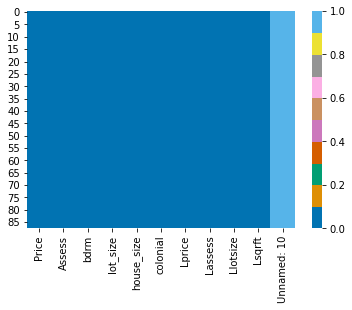

In [63]:
#Creating HEATMAP to show the presence of the missing values
sns.heatmap(Hprice.isnull(), cmap=sns.color_palette(palette='colorblind'), vmin=0, vmax=1) 
plt.show()

Based on the Heatmap we can see that there is a strange Unnamed: 10 column that have missing values. This unnamed column in pandas comes when we are reading CSV file using it, so we will simply drop the column unnamed:10. All other columns are clean.

In [64]:
Hprice = Hprice.drop('Unnamed: 10',axis=1)

Recheck the graph to make sure that the column is dropped

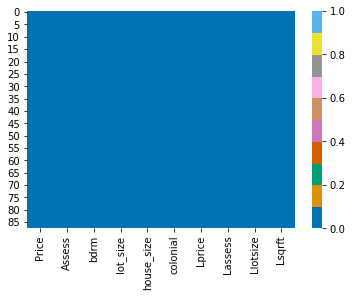

In [65]:
sns.heatmap(Hprice.isnull(), cmap=sns.color_palette(palette='colorblind'), vmin=0, vmax=1) 
plt.show()

Let's check to see if there is any null or missing value left in the dataset


In [66]:
Hprice.isnull()

,Price,Assess,bdrm,lot_size,house_size,colonial,Lprice,Lassess,Llotsize,Lsqrft
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
83,False,False,False,False,False,False,False,False,False,False
84,False,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False


Since Assess and Price value cannot be 0, we will drop any row where those values is  equal 0

In [67]:
Hprice.drop(Hprice.index[Hprice["Price"]==0], axis=0, inplace=True)
Hprice.drop(Hprice.index[Hprice["Assess"]==0], axis=0, inplace=True)

After that being done, we will detect if our variables have any outliers

> First we find outliers in our outcome variable by using histogram and box plot



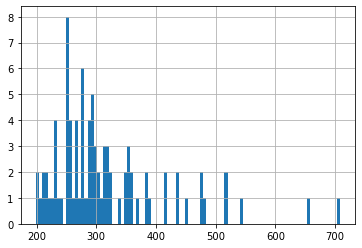

count     88.000000
mean     315.736364
std       95.314437
min      198.700000
25%      253.900000
50%      290.200000
75%      352.125000
max      708.600000
Name: Assess, dtype: float64

In [68]:
Hprice.Assess.hist(bins=100)
plt.show()
Hprice['Assess'].describe()

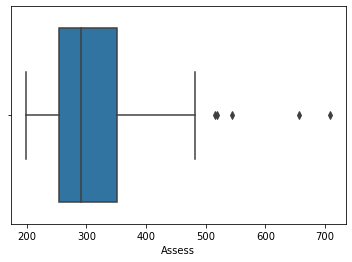

In [69]:
sns.boxplot(data=Hprice,x='Assess')
plt.show()

In [70]:
Hprice['bdrm'].unique() #find the unique variables in bdrm

array([4, 3, 5, 7, 2, 6])

We can use bar chart to see the distribution of a categorical variable bedroom (bdrm)

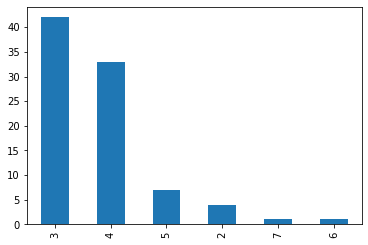

count    88.000000
mean      3.568182
std       0.841393
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: bdrm, dtype: float64

In [71]:
Hprice['bdrm'].value_counts().plot.bar()
plt.show()
Hprice['bdrm'].describe()

Next, we find outliers in our explanatory variable using histogram and box plot

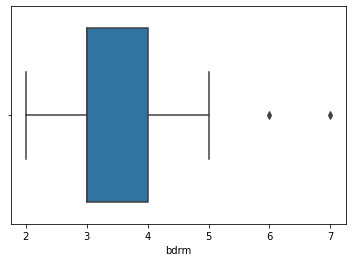

In [72]:
sns.boxplot(data=Hprice,x='bdrm')
plt.show()

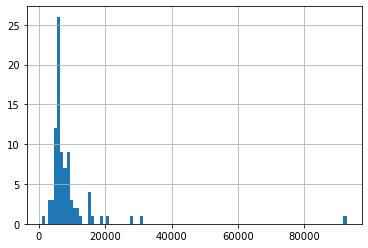

count       88.000000
mean      9019.863636
std      10174.150414
min       1000.000000
25%       5732.750000
50%       6430.000000
75%       8583.250000
max      92681.000000
Name: lot_size, dtype: float64

In [73]:
Hprice.lot_size.hist(bins=100)
plt.show()
Hprice['lot_size'].describe()

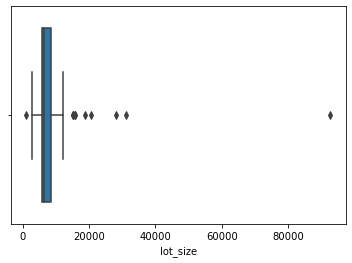

In [74]:
sns.boxplot(data=Hprice,x='lot_size')
plt.show()

Next, we find outliers in our outcome variable using histogram and box plot

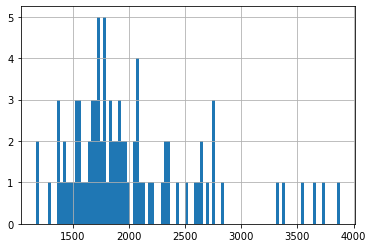

count      88.000000
mean     2013.693182
std       577.191583
min      1171.000000
25%      1660.500000
50%      1845.000000
75%      2227.000000
max      3880.000000
Name: house_size, dtype: float64

In [75]:
Hprice.house_size.hist(bins=100)
plt.show()
Hprice['house_size'].describe() 

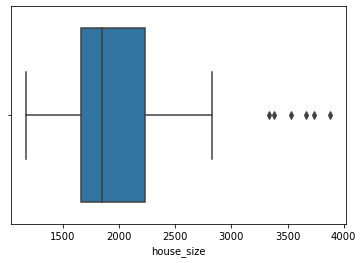

In [76]:
sns.boxplot(data=Hprice,x='house_size')
plt.show()

In [77]:
Hprice['colonial'].unique() #find the unique value in colonial

array([1, 0])

Using a bar chart we can see the distribution of the colonial variable

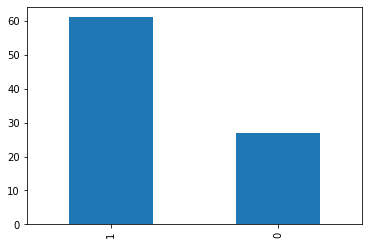

In [78]:
Hprice['colonial'].value_counts().plot.bar()
plt.show()

So, from the graphs and boxplots we know that all the value except colonial, which is a dummy variale, have outliers. To prevent these ourliers skewing our analysis, will take the natural log of them (lassess, llotsize, lsqrft, colonial)

**Rename Natrual Log columns**

In [79]:
Hprice.rename(columns = {'Llotsize':'llot_size', 'Lsqrft':'lhouse_size',}, inplace=True)
Hprice.head()

,Price,Assess,bdrm,lot_size,house_size,colonial,Lprice,Lassess,llot_size,lhouse_size
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630


In [80]:
Hprice['lbdrm'] = np.log(Hprice['bdrm'])
Hprice.head()

,Price,Assess,bdrm,lot_size,house_size,colonial,Lprice,Lassess,llot_size,lhouse_size,lbdrm
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934,1.386294
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198,1.098612
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482,1.098612
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938,1.098612
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630,1.386294


**Statistic Description Table**

In [81]:
Hprice.describe()

,Price,Assess,bdrm,lot_size,house_size,colonial,Lprice,Lassess,llot_size,lhouse_size,lbdrm
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,293.546034,315.736364,3.568182,9019.863636,2013.693182,0.693182,5.633180,5.717994,8.905105,7.572610,1.246202
std,102.713445,95.314437,0.841393,10174.150414,577.191583,0.463816,0.303573,0.262113,0.544060,0.258688,0.227349
min,111.000000,198.700000,2.000000,1000.000000,1171.000000,0.000000,4.709530,5.291796,6.907755,7.065613,0.693147
25%,230.000000,253.900000,3.000000,5732.750000,1660.500000,0.000000,5.438079,5.536940,8.653908,7.414873,1.098612
50%,265.500000,290.200000,3.000000,6430.000000,1845.000000,1.000000,5.581613,5.670566,8.768719,7.520231,1.098612
75%,326.250000,352.125000,4.000000,8583.250000,2227.000000,1.000000,5.787642,5.863982,9.057567,7.708266,1.386294
max,725.000000,708.600000,7.000000,92681.000000,3880.000000,1.000000,6.586172,6.563291,11.436920,8.263591,1.945910


**Regression Analysis**

In [82]:
#IMPORT TOOLS
import patsy                           # provides a syntax for specifying models  
import statsmodels.api as sm           # provides statistical models like ols, gmm, anova, etc...
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

In [83]:
Hprice

,Price,Assess,bdrm,lot_size,house_size,colonial,Lprice,Lassess,llot_size,lhouse_size,lbdrm
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934,1.386294
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198,1.098612
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482,1.098612
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938,1.098612
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630,1.386294
...,...,...,...,...,...,...,...,...,...,...,...
83,295.0,318.3,3,6056,1837,1,5.686975,5.762994,8.708805,7.515889,1.098612
84,236.0,259.4,3,5828,1715,0,5.463832,5.558371,8.670429,7.447168,1.098612
85,202.5,258.1,3,6341,1574,0,5.310740,5.553347,8.754792,7.361375,1.098612
86,219.0,232.0,2,6362,1185,0,5.389072,5.446737,8.758098,7.077498,0.693147


**FIRST MODEL - Lassess ~ llot size**

In [84]:
result1 = smf.ols('Lassess ~ llot_size', data=Hprice).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                Lassess   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     38.83
Date:                Tue, 25 May 2021   Prob (F-statistic):           1.65e-08
Time:                        17:01:31   Log-Likelihood:                 9.8614
No. Observations:                  88   AIC:                            -15.72
Df Residuals:                      86   BIC:                            -10.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3252      0.385      8.644      0.0

**Model 1 Intepretation**

---




> ceterus paribus, 1% increase in lot size will increase the Assess by 26.87%  




**SECOND MODEL - Lassess ~ llotsize + lbdrm**

In [85]:
result2 = smf.ols('Lassess ~ llot_size + lbdrm', data=Hprice).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                Lassess   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     33.34
Date:                Tue, 25 May 2021   Prob (F-statistic):           2.04e-11
Time:                        17:01:31   Log-Likelihood:                 18.950
No. Observations:                  88   AIC:                            -31.90
Df Residuals:                      85   BIC:                            -24.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0169      0.356      8.477      0.0

**Model 2 Intepretation**

---




> ceterus paribus, 1% increase in the number of bedroom will increase the Assess by 41.73% 


> ceterus paribus, 1% increase in lot size will increase the Assess by 24.49% 




**THIRD MODEL - Lassess ~ llotsize + lhouse size + lbedroom count**

In [86]:
result3 = smf.ols('Lassess ~ llot_size + lhouse_size + lbdrm', data=Hprice).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                Lassess   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 25 May 2021   Prob (F-statistic):           2.61e-33
Time:                        17:01:32   Log-Likelihood:                 74.069
No. Observations:                  88   AIC:                            -140.1
Df Residuals:                      84   BIC:                            -130.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5417      0.368     -4.187      

**Model 3 Intepretation**

---




> ceterus paribus, 1% increase in the house square will increase the Assess by 77.91%

> ceterus paribus, 1% increase in the number of bedroom will decrease the Assess by 0.82%. However it is not significant

> ceterus paribus, 1% increase in lot size will increase the Assess by 15.39%

**FOURTH MODEL - Lassess ~ llotsize + lhouse size + lbedroom count + colonial**

In [87]:
result4 = smf.ols('Lassess ~ llot_size + lhouse_size + lbdrm + colonial', data=Hprice).fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                Lassess   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 25 May 2021   Prob (F-statistic):           3.13e-32
Time:                        17:01:33   Log-Likelihood:                 74.174
No. Observations:                  88   AIC:                            -138.3
Df Residuals:                      83   BIC:                            -126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5521      0.371     -4.187      

**Model 4 Intepretation**

---




> ceterus paribus, 1% increase in the colonial will increase the Assess by 1.17%. However it is not significant

> ceterus paribus, 1% increase in the house square will increase the Assess by 78.11%.

> ceterus paribus, 1% increase in the number of bedroom will decrease the Assess by 1.74%. However, it is not significant

> ceterus paribus, 1% increase in the lot size will increase the Assess by 15.37%








Now lets take a look at only the Parameters, Intercepts, Confidence Intervals, and R-squared

In [88]:
print('The parameters are: \n', result4.params, '\n')
print('The confidence intervals are:\n', result4.conf_int(), '\n')
print('The r-squared is:', result4.rsquared)

The parameters are: 
 Intercept     -1.552126
llot_size      0.153689
lhouse_size    0.781113
lbdrm         -0.017418
colonial       0.011745
dtype: float64 

The confidence intervals are:
                     0         1
Intercept   -2.289509 -0.814743
llot_size    0.109431  0.197948
lhouse_size  0.673286  0.888940
lbdrm       -0.141668  0.106832
colonial    -0.040790  0.064281 

The r-squared is: 0.8402679056398391


**CONCLUSION**

---



> When the model is controled by house square, colonial, and bedroom count, there is still a significant realtion between assess and the lot size. Therefore we can say that the lot size contribute a significant increase in the house's assessd value by 15.37%

> Another noticable significant variable is the house square which will increase the house's assessed value by 78.11%

>The model has no multicollinearity.


> However there are some limitations in our analysis due to the lack of context of the variable and the size of our data has too little variables which might potentially create biased results.







**TRANSFORMING THE DATA**

Create a scatter plot of Assess and lot size

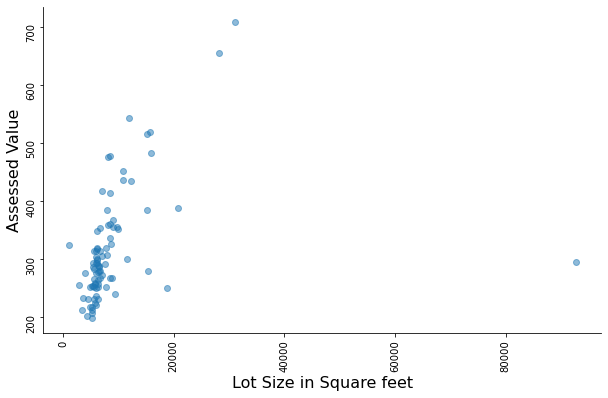

In [89]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(Hprice['lot_size'], Hprice['Assess'], marker='o', alpha = 0.5 )

ax.set_xlabel('Lot Size in Square feet', fontsize=16)
ax.set_ylabel('Assessed Value', fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=90)

**Combine all the three models and display them side by side**

In [90]:
from statsmodels.iolib.summary2 import summary_col #create regression table for your report

table = summary_col(
    [result1, result2, result3, result4], #results of the fitted models
    model_names = ['Model 1', 'Model 2', 'Model 3', 'model 4'], #models fitted above
    stars=True, #level of significance
    regressor_order = ['Intercept', 'Assess', 'Assess', 'bdrm', 'house_size', 'colonial'], #order of explanatory vars in the table
    float_format='%0.2f', 
    drop_omitted = False #
    )

table.add_title('Does the House Lot Size Affect Its Assessed Value?')
print(table.as_text())

# we use 'w' to 'write'.
fout = open('table1.txt', 'w')
fout.write(table.as_text()) #can export as text, latex or html
fout.close()

Does the House Lot Size Affect Its Assessed Value?
               Model 1 Model 2 Model 3  model 4 
------------------------------------------------
Intercept      3.33*** 3.02*** -1.54*** -1.55***
               (0.38)  (0.36)  (0.37)   (0.37)  
colonial                                0.01    
                                        (0.03)  
lbdrm                  0.42*** -0.01    -0.02   
                       (0.09)  (0.06)   (0.06)  
lhouse_size                    0.78***  0.78*** 
                               (0.05)   (0.05)  
llot_size      0.27*** 0.24*** 0.15***  0.15*** 
               (0.04)  (0.04)  (0.02)   (0.02)  
R-squared      0.31    0.44    0.84     0.84    
R-squared Adj. 0.30    0.43    0.83     0.83    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**Residual Plot of all the results**

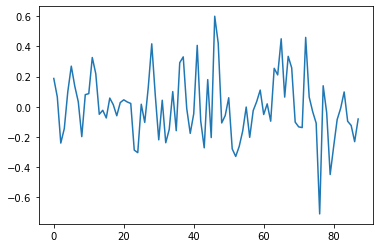

In [91]:
resid1=result1.resid.plot()

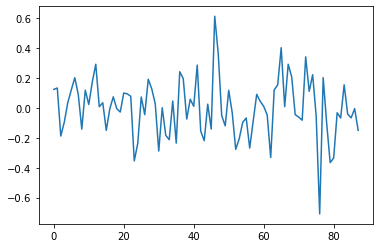

In [92]:
resid2=result2.resid.plot()

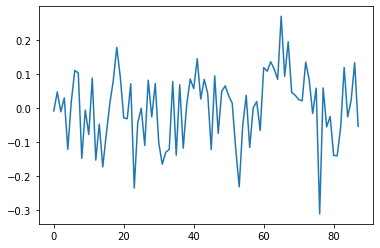

In [93]:
resid3=result3.resid.plot()

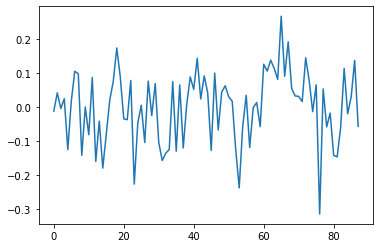

In [94]:
resid4=result4.resid.plot()

***Pair Plot***

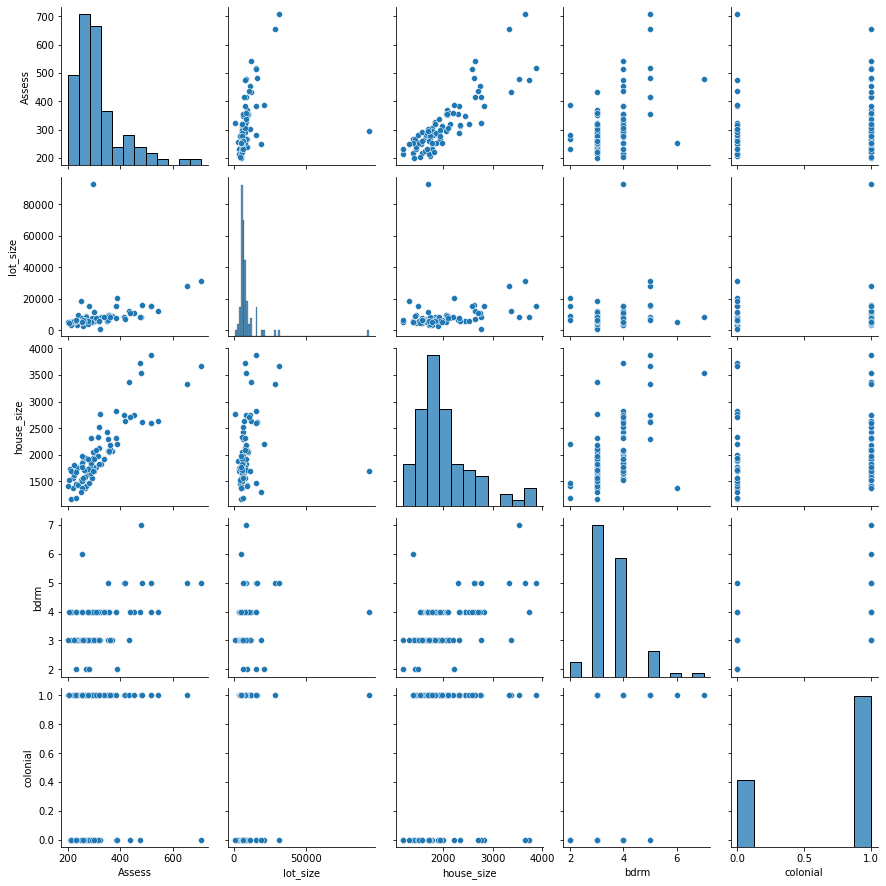

In [95]:
sns.pairplot(Hprice[['Assess','lot_size','house_size','bdrm','colonial']])

**Correlation**

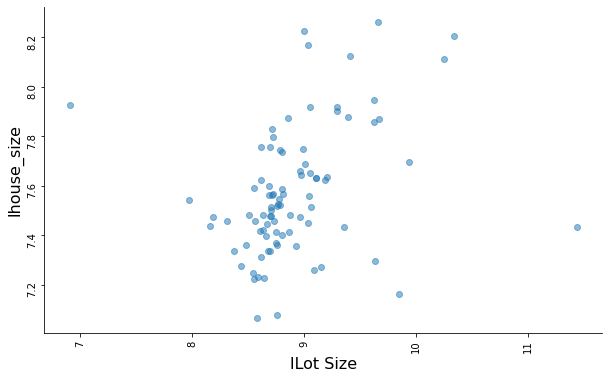

In [96]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(Hprice['llot_size'], Hprice['lhouse_size'], marker='o', alpha = 0.5 )

ax.set_xlabel('lLot Size', fontsize=16)
ax.set_ylabel('lhouse_size', fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=90)

In [97]:
correlation_Hprice = Hprice.corr()
correlation_Hprice

,Price,Assess,bdrm,lot_size,house_size,colonial,Lprice,Lassess,llot_size,lhouse_size,lbdrm
Price,1.000000,0.905279,0.508084,0.347124,0.787907,0.137946,0.966501,0.873144,0.528780,0.750303,0.471991
Assess,0.905279,1.000000,0.482474,0.328146,0.865634,0.082936,0.868240,0.982962,0.571665,0.847185,0.453211
bdrm,0.508084,0.482474,1.000000,0.136326,0.531474,0.304575,0.463490,0.458744,0.169490,0.519579,0.982808
lot_size,0.347124,0.328146,0.136326,1.000000,0.183842,0.014019,0.324554,0.309907,0.807855,0.164870,0.124348
house_size,0.787907,0.865634,0.531474,0.183842,1.000000,0.065421,0.764000,0.866214,0.338607,0.985816,0.513137
colonial,0.137946,0.082936,0.304575,0.014019,0.065421,1.000000,0.180516,0.109972,0.038642,0.106286,0.335969
Lprice,0.966501,0.868240,0.463490,0.324554,0.764000,0.180516,1.000000,0.875004,0.504143,0.743633,0.429469
Lassess,0.873144,0.982962,0.458744,0.309907,0.866214,0.109972,0.875004,1.000000,0.557734,0.864664,0.431270
llot_size,0.528780,0.571665,0.169490,0.807855,0.338607,0.038642,0.504143,0.557734,1.000000,0.311299,0.136342
lhouse_size,0.750303,0.847185,0.519579,0.164870,0.985816,0.106286,0.743633,0.864664,0.311299,1.000000,0.513552


In [98]:
corr_1=Hprice['llot_size'].corr(Hprice['lhouse_size'])
corr_1

0.3112992452065435